### Initial package imports

In [3]:
import pandas as pd
import math


## Initial files being read in and dataset creation

In [ ]:
# Read the data
main_df = pd.read_csv('Data/Cleaned_Indices_Assignment1.csv', sep=';')

# Read the interest rate data
#interest_rate_df = pd.read_csv('Data/ECB_Rates_2012_to_2022.csv', sep=';')
interest_rate_bond_df = pd.read_csv('Data/ECB_Data_10yr_Treasury_bond.csv', sep=',')

# Convert date columns to datetime format for proper merging
main_df['Date'] = pd.to_datetime(main_df['Date'], format='%d-%m-%Y')
#interest_rate_df['Date'] = pd.to_datetime(interest_rate_df['Date'], format='%d-%m-%Y')
#gov_bond_investment_df['Date'] = pd.to_datetime(gov_bond_investment_df['Date'], format='%Y-%m-%d')
interest_rate_bond_df['Date'] = pd.to_datetime(interest_rate_bond_df['Date'], format='%Y-%m-%d')

# Merge the dataframes on the Date column
main_df = pd.merge(main_df, interest_rate_bond_df, on='Date', how='left')
#main_df = pd.merge(main_df, gov_bond_investment_df, on='Date', how='left')

# change name of the column Yield curve spot rate, 10-year maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition) (YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_10Y)
main_df.rename(columns={'Yield curve spot rate, 10-year maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition) (YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_10Y)': 'Interest_Rate_Bond'}, inplace=True)




In [ ]:
# add columns for the daily interest rate on the government bond

# add a column for the interest bond value per day. Interest rate is locked in at 2.717862 at 287 days in a year
interest_bond = 2.717862
interest_bond_vector = [1500000]
for _ in range(1, len(main_df)):
    interest_bond_vector.append(interest_bond_vector[-1] * 1.00009404)

# initialize a vector taking the loss of the interest rate into account
interest_bond_loss_vector = [0]
interest_bond_profit_vector = [0]
for i in range(1, len(interest_bond_vector)):
    loss = - (interest_bond_vector[i] - interest_bond_vector[i - 1])
    interest_bond_loss_vector.append(loss)

    profit = interest_bond_vector[i] - interest_bond_vector[i - 1]
    interest_bond_profit_vector.append(profit)

# add both vectors to the dataframe
main_df['Interest_Bond'] = interest_bond_vector
main_df['Interest_Bond_Profit'] = interest_bond_profit_vector
main_df['Interest_Bond_Loss'] = interest_bond_loss_vector

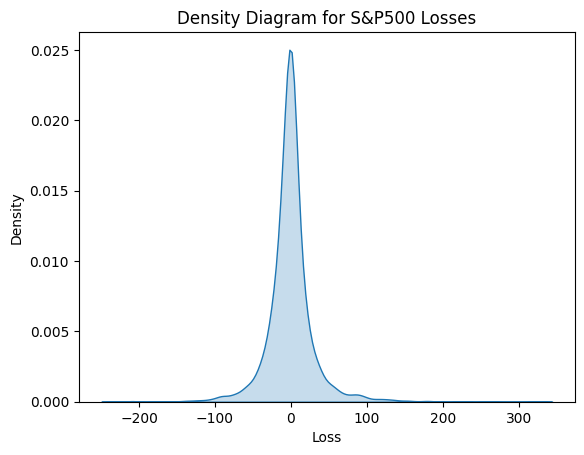

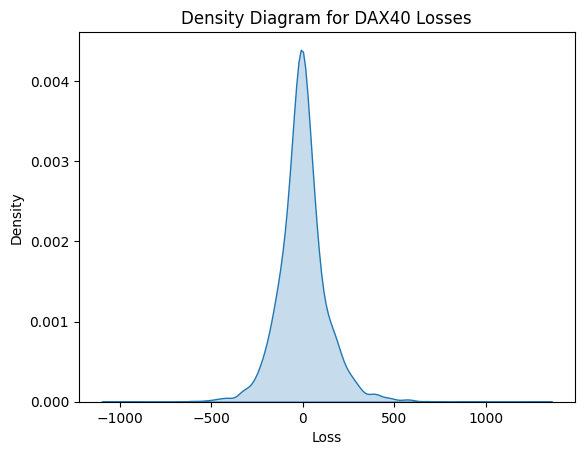

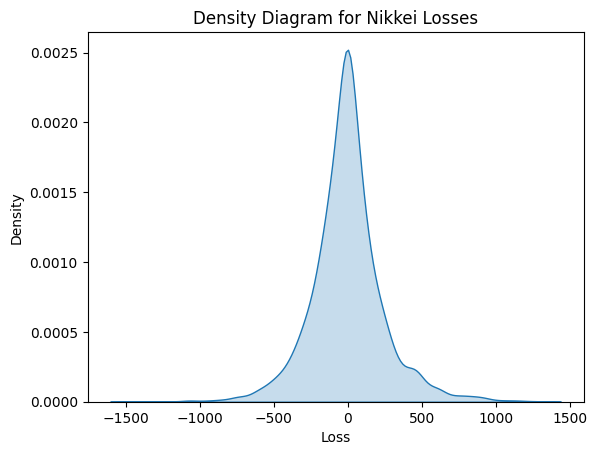

In [42]:
import seaborn as sns

import matplotlib.pyplot as plt

# Convert the U_S&P500_Loss column to numeric, replacing commas and handling errors
main_df['U_S&P500_Loss'] = pd.to_numeric(main_df['U_S&P500_Loss'].astype(str).str.replace(',', '.'), errors='coerce')

# Plot the density diagram for S&P500 losses
sns.kdeplot(data=main_df, x='U_S&P500_Loss', fill=True)
plt.title('Density Diagram for S&P500 Losses')
plt.xlabel('Loss')
plt.ylabel('Density')
plt.show()

# Convert the U_Dax40_Loss column to numeric, replacing commas and handling errors
main_df['U_Dax40_Loss'] = pd.to_numeric(main_df['U_Dax40_Loss'].astype(str).str.replace(',', '.'), errors='coerce')

# Plot the density diagram for DAX40 losses
sns.kdeplot(data=main_df, x='U_Dax40_Loss', fill=True)
plt.title('Density Diagram for DAX40 Losses')
plt.xlabel('Loss')
plt.ylabel('Density')
plt.show()

# Convert the U_Nikkei_Loss column to numeric, replacing commas and handling errors
main_df['U_Nikkei_Loss'] = pd.to_numeric(main_df['U_Nikkei_Loss'].astype(str).str.replace(',', '.'), errors='coerce')

# Plot the density diagram for Nikkei losses
sns.kdeplot(data=main_df, x='U_Nikkei_Loss', fill=True)
plt.title('Density Diagram for Nikkei Losses')
plt.xlabel('Loss')
plt.ylabel('Density')
plt.show()

## Portfolio details

### Instruments:
- **S&P500**
- **DAX40**
- **NIKKEI**
- **EU Government Bond (10-year maturity, AAA-rated)**

### Invested amount:
- **10,000,000 EURO**

### Period:
- **01/01/2012 - 31/12/2022**

### Weights:
- **S&P500**: 0.4  
- **DAX40**: 0.3  
- **NIKKEI**: 0.15  
- **EU Government Bond**: 0.15  

### Measures:
- **Value at Risk (VaR)**: 1, 5, 10 days  
- **Expected Shortfall (ES)**  



In [39]:
main_df


,Date,S&P500_Closing,Dax40_Closing,Nikkei_Closing,U_S&P500_Returns,U_Dax40_Returns,U_Nikkei_Returns,U_S&P500_Loss,U_Dax40_Loss,U_Nikkei_Loss,...,C_S&P500_Loss,C_Dax40_Loss,C_Nikkei_Loss,USD/EUR,JPY/EUR,TIME PERIOD,Interest_Rate_Bond,Interest_Bond,Interest_Bond_Profit,Interest_Bond_Loss
0,2012-01-02,NaN,"6.075,52",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"€ 0,773200","€ 0,010060",02 Jan 2012,2.717862,1.500000e+06,0.000000,0.000000
1,2012-01-03,"1.277,06","6.166,57",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"€ 0,766200","€ 0,009991",03 Jan 2012,2.744522,1.500141e+06,141.060000,-141.060000
2,2012-01-04,"1.277,30","6.111,55","8.560,11",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"€ 0,772500","€ 0,010070",04 Jan 2012,2.776691,1.500282e+06,141.073265,-141.073265
3,2012-01-05,"1.281,06","6.095,99","8.488,71","0,002939385","-0,002549246","-0,008375995","-3,76","15,56","71,4",...,"-2,940696","15,56","0,722568","€ 0,782100","€ 0,010120",05 Jan 2012,2.784807,1.500423e+06,141.086532,-141.086532
4,2012-01-06,"1.277,81","6.057,92","8.390,35","-0,002540185","-0,006264671","-0,011654809","3,25","38,07","98,36",...,"2,554825","38,07","1,0042556","€ 0,786100","€ 0,010210",06 Jan 2012,2.788371,1.500564e+06,141.099800,-141.099800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,2022-12-26,"3.844,82","13.940,93","26.405,87",0,0,"0,006482408",0,0,"-170,62",...,0,0,"-1,20679526","€ 0,942200","€ 0,007006",NaN,NaN,1.963791e+06,184.657587,-184.657587
2866,2022-12-27,"3.829,25","13.995,10","26.447,87","-0,004057826","0,003878151","0,001589292","15,57","-54,17",-42,...,"14,631129","-54,17","-0,295638","€ 0,937900","€ 0,007051",27 Dec 2022,2.501054,1.963976e+06,184.674952,-184.674952
2867,2022-12-28,"3.783,22","13.925,60","26.340,50","-0,012093463","-0,004978395","-0,004067947","46,03","69,5","107,37",...,"43,369466","69,5","0,75223422","€ 0,934100","€ 0,007123",28 Dec 2022,2.522043,1.964161e+06,184.692319,-184.692319
2868,2022-12-29,"3.849,28","14.071,72","26.093,67","0,017310619","0,010438237","-0,009414922","-66,06","-146,12","246,83",...,"-61,957674","-146,12","1,74039833",NaN,NaN,29 Dec 2022,2.526705,1.964346e+06,184.709687,-184.709687
